### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

#### Описание задачи

Развлекательное приложение Procrastinate Pro+ несколько месяцев терпит убытки, несмотря на огромные вложения в рекламу. Необходимо разобраться в причинах и помочь компании выйти в плюс.
В нашем распоряжении данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: информация об их сессиях, покупках, а также о рекламных расходах компании

#### Чтение датасетов

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv', sep=',')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv', sep=',')

In [3]:
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv', sep=',')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv', sep=',')

In [4]:
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv', sep=',')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv', sep=',')

#### Предобработка таблицы visits

In [5]:
visits.head(3)

User Id         Region  Device  Channel        Session Start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States     Mac  organic  2019-05-01 14:09:25   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пропусков нет, приведем названия столбцов к единому стилю.

In [7]:
visits = (visits
          .rename(columns={'User Id': 'user_id',
                           'Session Start': 'session_start',
                           'Session End': 'session_end'
                          })
          .rename(str.lower, axis=1)
         )

Преобразуем поля, содержащие даты, к соответствующему типу

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


#### Предобработка таблицы orders

In [10]:
orders.head(3)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [12]:
orders = (orders
          .rename(columns={'User Id': 'user_id',
                           'Event Dt': 'event_dt'
                          })
          .rename(str.lower, axis=1)
         )

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


#### Предобработка таблицы costs

In [15]:
costs.head(3)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [17]:
costs = costs.rename(str.lower, axis=1)

In [18]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Проверка на наличие дубликатов

In [20]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Дубликатов нет

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [21]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [22]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [23]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [24]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [25]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [26]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [27]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [28]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

In [29]:
profiles = get_profiles(sessions=visits, orders=orders, events=[], ad_costs=costs)

In [30]:
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt      month  payer  acquisition_cost  
0       2019-05-07 2019-05-01   True          1.088172  
1       2019-07-09 2019-07-01  False          1.107237  
2       2019-10-01 2019-10-01  False          0.000000  
3       2019-08-22 2019-08-01  False          0.988235  
4       2019-10-02 2019-10-01  False          0.230769  
...            ...        ...    ...               ...  
150003  2019-09-28 2019-09-01  False          3.500000  
150004  2019-10-21 2019-10-01  False          0.000000  
150005  2019-07-23 2019-07-01  False          2.600000  
150006  2019-09-28 2019-09-01  False          0.205714  
150007  2019-10-18 2019-10-01  False          0.000000  

[150008 rows x 9 columns]

Минимальная и максимальная дата привлечения

In [31]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print(min_date)
print(max_date)

2019-05-01
2019-10-27


Как и говорилось выше, в нашем распоряжении даты с 1 мая по 27 октября 2019 года

#### Платящие пользователи по странам

In [32]:
countries_stat = (profiles
                  .groupby(by='region')
                  .agg({'user_id': 'count', 'payer':['sum', 'mean']})
                  .rename(columns={'count': 'users_count', 
                                   'sum': 'count_of_paying', 
                                   'mean': 'share_of_paying'})
                  .droplevel(0, axis=1)
                  .sort_values('share_of_paying', ascending=False)
                 )
countries_stat

users_count  count_of_paying  share_of_paying
region                                                      
United States       100002             6902         0.069019
Germany              14981              616         0.041119
UK                   17575              700         0.039829
France               17450              663         0.037994

США - страна с самой высокой доле платящих пользователей (там и в абсолютных значения наибольшее число уникальных клиентов)

#### Платящие пользователи по устройствам

In [33]:
devices_stat = (profiles
                .groupby('device')
                .agg({'user_id': 'count', 'payer':['sum', 'mean']})
                .rename(columns={'count': 'users_count',
                                 'sum': 'count_of_paying',
                                 'mean': 'share_of_paying'})
                .droplevel(0, axis=1)
                .sort_values('share_of_paying', ascending=False)
               )
devices_stat

users_count  count_of_paying  share_of_paying
device                                                
Mac            30042             1912         0.063644
iPhone         54479             3382         0.062079
Android        35032             2050         0.058518
PC             30455             1537         0.050468

Больше всего доля платящих пользователей среди пользователй Mac и iPhone

#### Платящие пользователи по каналам

In [34]:
channel_stat = (profiles
                .groupby('channel')
                .agg({'user_id': 'count', 'payer':['sum', 'mean']})
                .rename(columns={'count': 'users_count',
                                 'sum': 'count_of_paying',
                                 'mean': 'share_of_paying'})
                .droplevel(0, axis=1)
                .sort_values('share_of_paying', ascending=False)
               )
channel_stat

users_count  count_of_paying  share_of_paying
channel                                                          
FaceBoom                  29144             3557         0.122049
AdNonSense                 3880              440         0.113402
lambdaMediaAds             2149              225         0.104700
TipTop                    19561             1878         0.096007
RocketSuperAds             4448              352         0.079137
WahooNetBanner             8553              453         0.052964
YRabbit                    4312              165         0.038265
MediaTornado               4364              156         0.035747
LeapBob                    8553              262         0.030633
OppleCreativeMedia         8605              233         0.027077
organic                   56439             1160         0.020553

Наибольшую долю платящих пользователей удается привлечь через каналы FaceBoom, AdNonSense. Меньше всего доля платящих среди пользователей, пришедших самостоятельно (organic).

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Расходы на маркетинг

In [35]:
costs.head(3)

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8

In [36]:
costs['costs'].sum()

105497.30000000002

В общей сложности на маркетинговые компании потрачено 105 497 долларов

#### Распределение трат по источникам

In [37]:
(costs
 .groupby('channel')
 .agg({'costs': 'sum'})
 .sort_values('costs', ascending=False)
)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

На TipTop приходится почти половина всех маркетинговых расходов. При этом лишь 9,6% пользователй, привлеченных через TipTop становятся платящими. На втором месте FaceBoom (лидер по платящим пользователям). На третьем WahooNetBanner - середнячок по платящим клиентам.

#### Расходы по времени по источникам

In [38]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

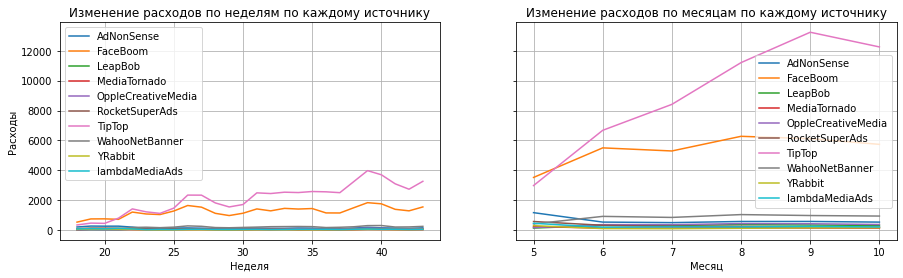

In [39]:
channels_weekly = costs.pivot_table(
        index='week', columns='channel', values='costs', aggfunc='sum'
    )
ax1 = plt.subplot(1, 2, 1)

channels_weekly.plot(
    figsize=(15, 4),
    grid=True,
    ax=ax1
)

plt.legend()
plt.title('Изменение расходов по неделям по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Расходы')

channels_monthly = costs.pivot_table(
        index='month', columns='channel', values='costs', aggfunc='sum'
    )
ax2 = plt.subplot(1, 2, 2, sharey=ax1)

channels_monthly.plot(
    figsize=(15, 4),
    grid=True,
    ax=ax2
)

plt.legend()
plt.title('Изменение расходов по месяцам по каждому источнику')
plt.xlabel('Месяц')
plt.show()

В недельном и месячном разрезах выделяются только 2 источника: TipTop и FaceBoom. На их рекламные компании расходы стабильно растут практически на всем периоде анализа. Остальные источники практически не отличаются друг от друга по динамике

#### Средняя стоимость привлечения пользователя

In [40]:
profiles.head(3)

user_id            first_ts   channel  device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   
2  6085896 2019-10-01 09:58:33   organic  iPhone         France  2019-10-01   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000

In [41]:
mean_cac = (profiles
            .groupby('channel')
            .agg({'acquisition_cost': 'mean'})
            .sort_values(by='acquisition_cost', ascending=False)
           )
mean_cac

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

Чтобы привлечь одного пользователя через TipTop приходится потратить 2,8 доллара. FaceBoom обходитится почти в 3 раза дешевле. Вырисовывается проблема с каналом TipTop

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Окупаемость рекламы

In [42]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles_not_organic = profiles.query('channel != "organic"')

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days
)

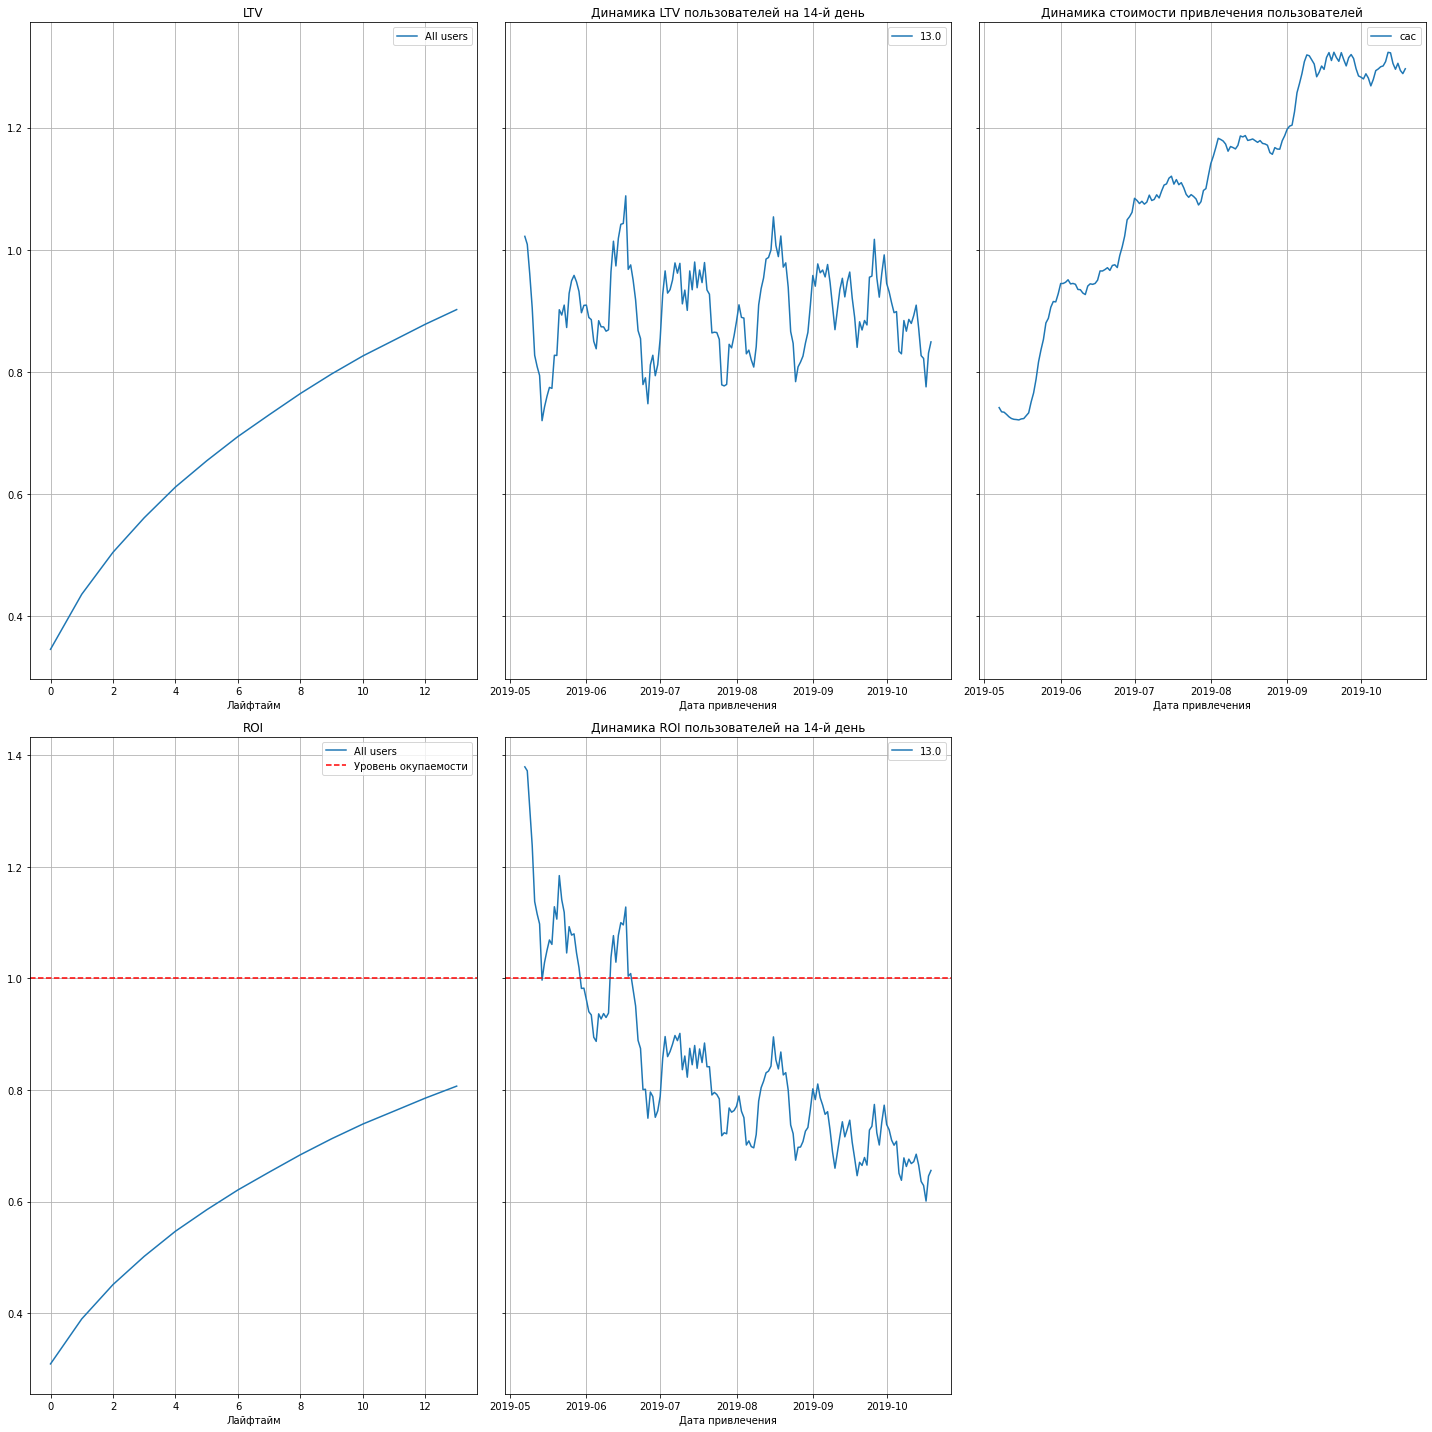

In [44]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Средняя накопительная выручка (LTV) растет, как и положено. Ярко-выраженного сезонного фактора не наблюдается. 
- CAC сильно растет (рекламный бюджет постоянно увеличивается).
- ROI в конце периода анализа сильно не дотягивает до 1, следовательно реклама не окупается

#### Конверсия и удержание

In [45]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=[]
)

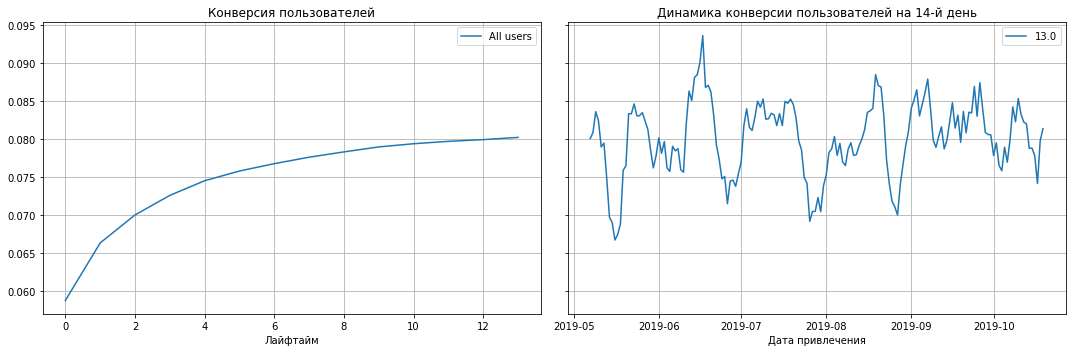

In [46]:
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей растет, однако пользователи, привлеченные в середине июня конвертировались значительно лучше

In [47]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=[]
)

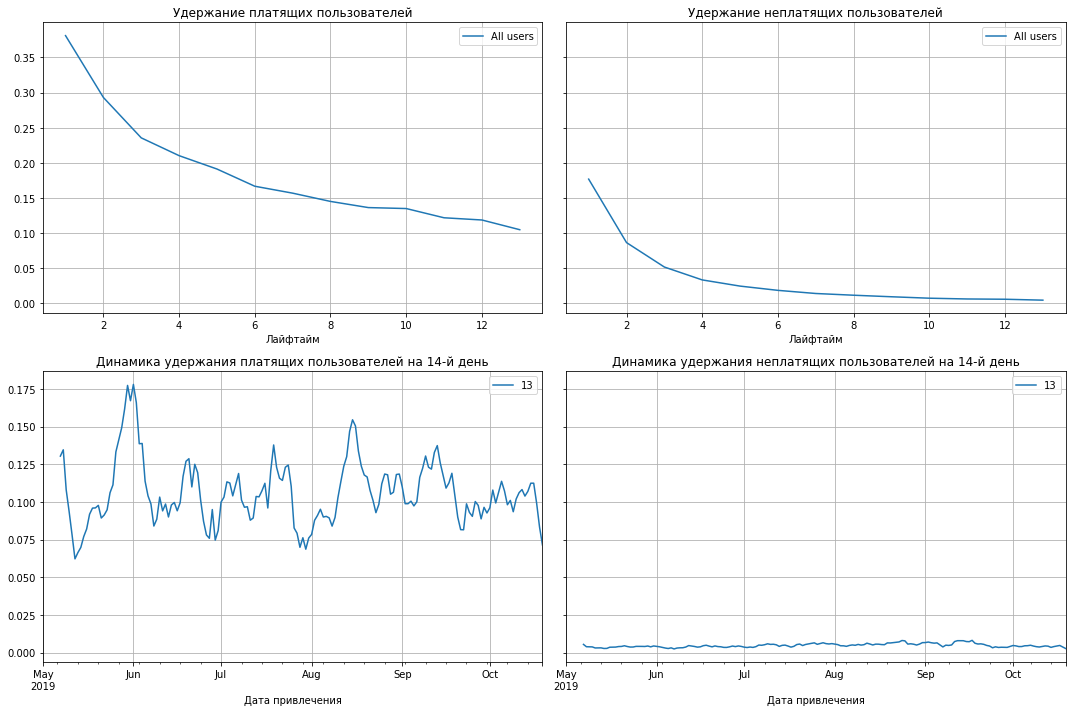

In [48]:
plot_retention(retention_grouped, retention_history, horizon_days)

Кривая удержания платящих пользователей выше, чем кривая неплатящих, что вполне нормально

#### Окупаемость рекламы с разбивкой по устройствам

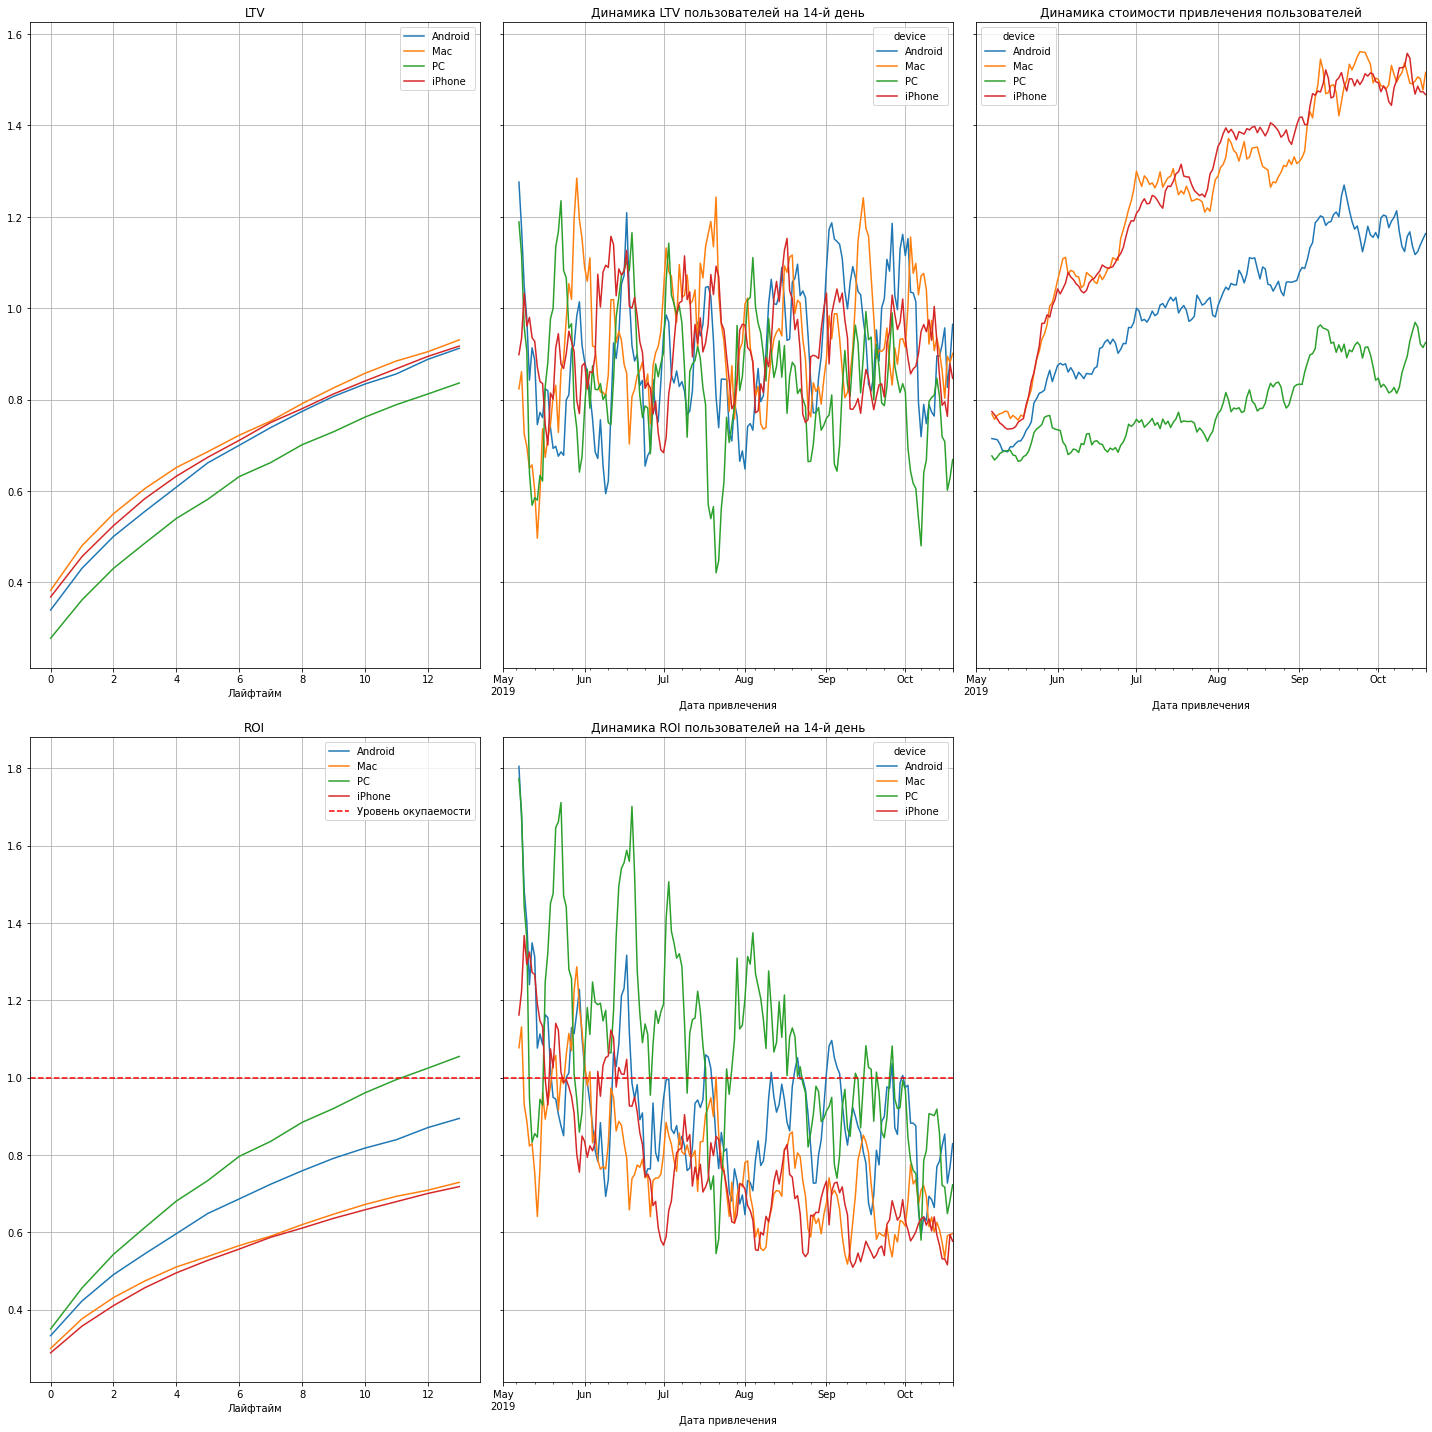

In [49]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['device']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Только PC немного выбивается по LTV
- Стоимость привлечения растет по всем платформам, но iPhone и Mac дороже всего
- Окупается только реклама на PC (ROI больше нуля), а на Mac, iPhone, Android - нет

#### Окупаемость рекламы с разбивкой по странам

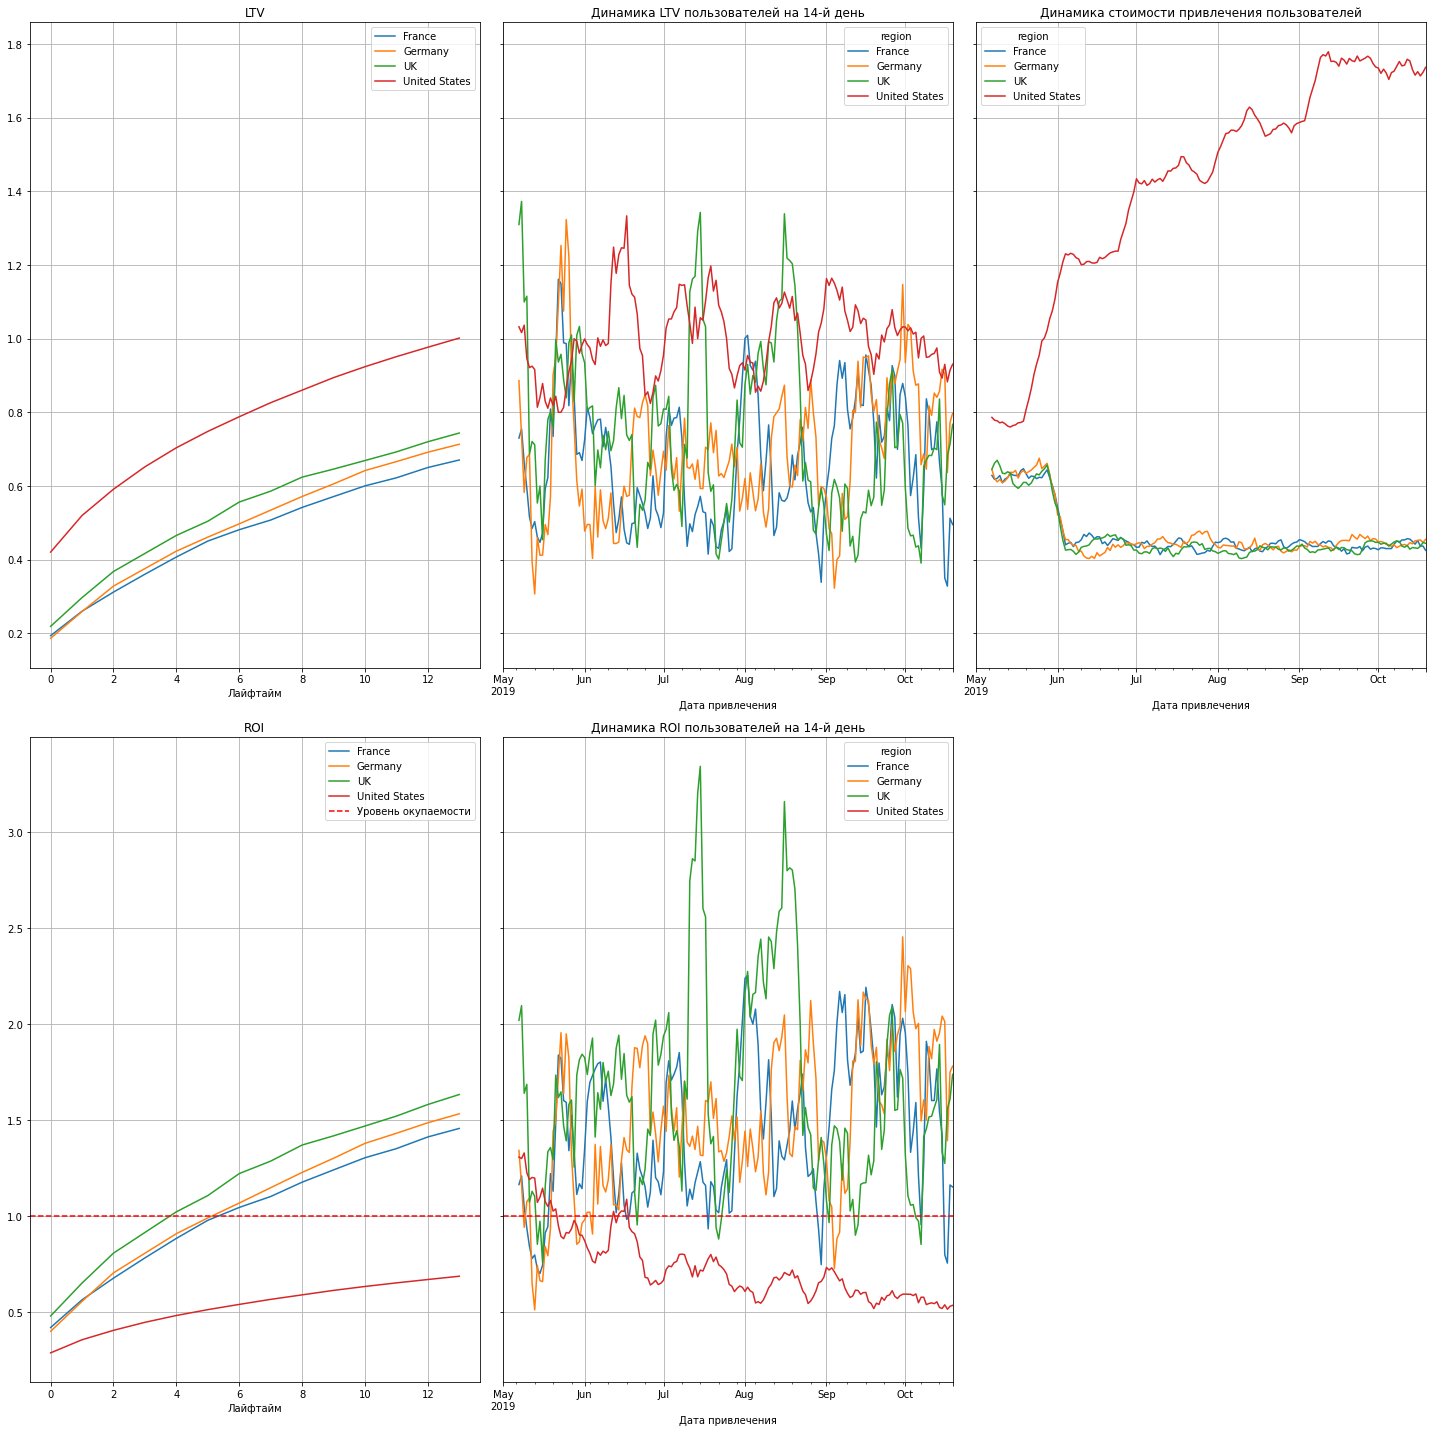

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['region']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Стоимость привлечения пользователей США растет, в остальных регионах затраты на привлечение стабильны
- При этом реклама в США не окупается, в отличие от других стран.
- ROI на 14-ый день в США стабильно снижается по мере привлечения новых пользователей

#### Окупаемость рекламы с разбивкой по рекламным каналам

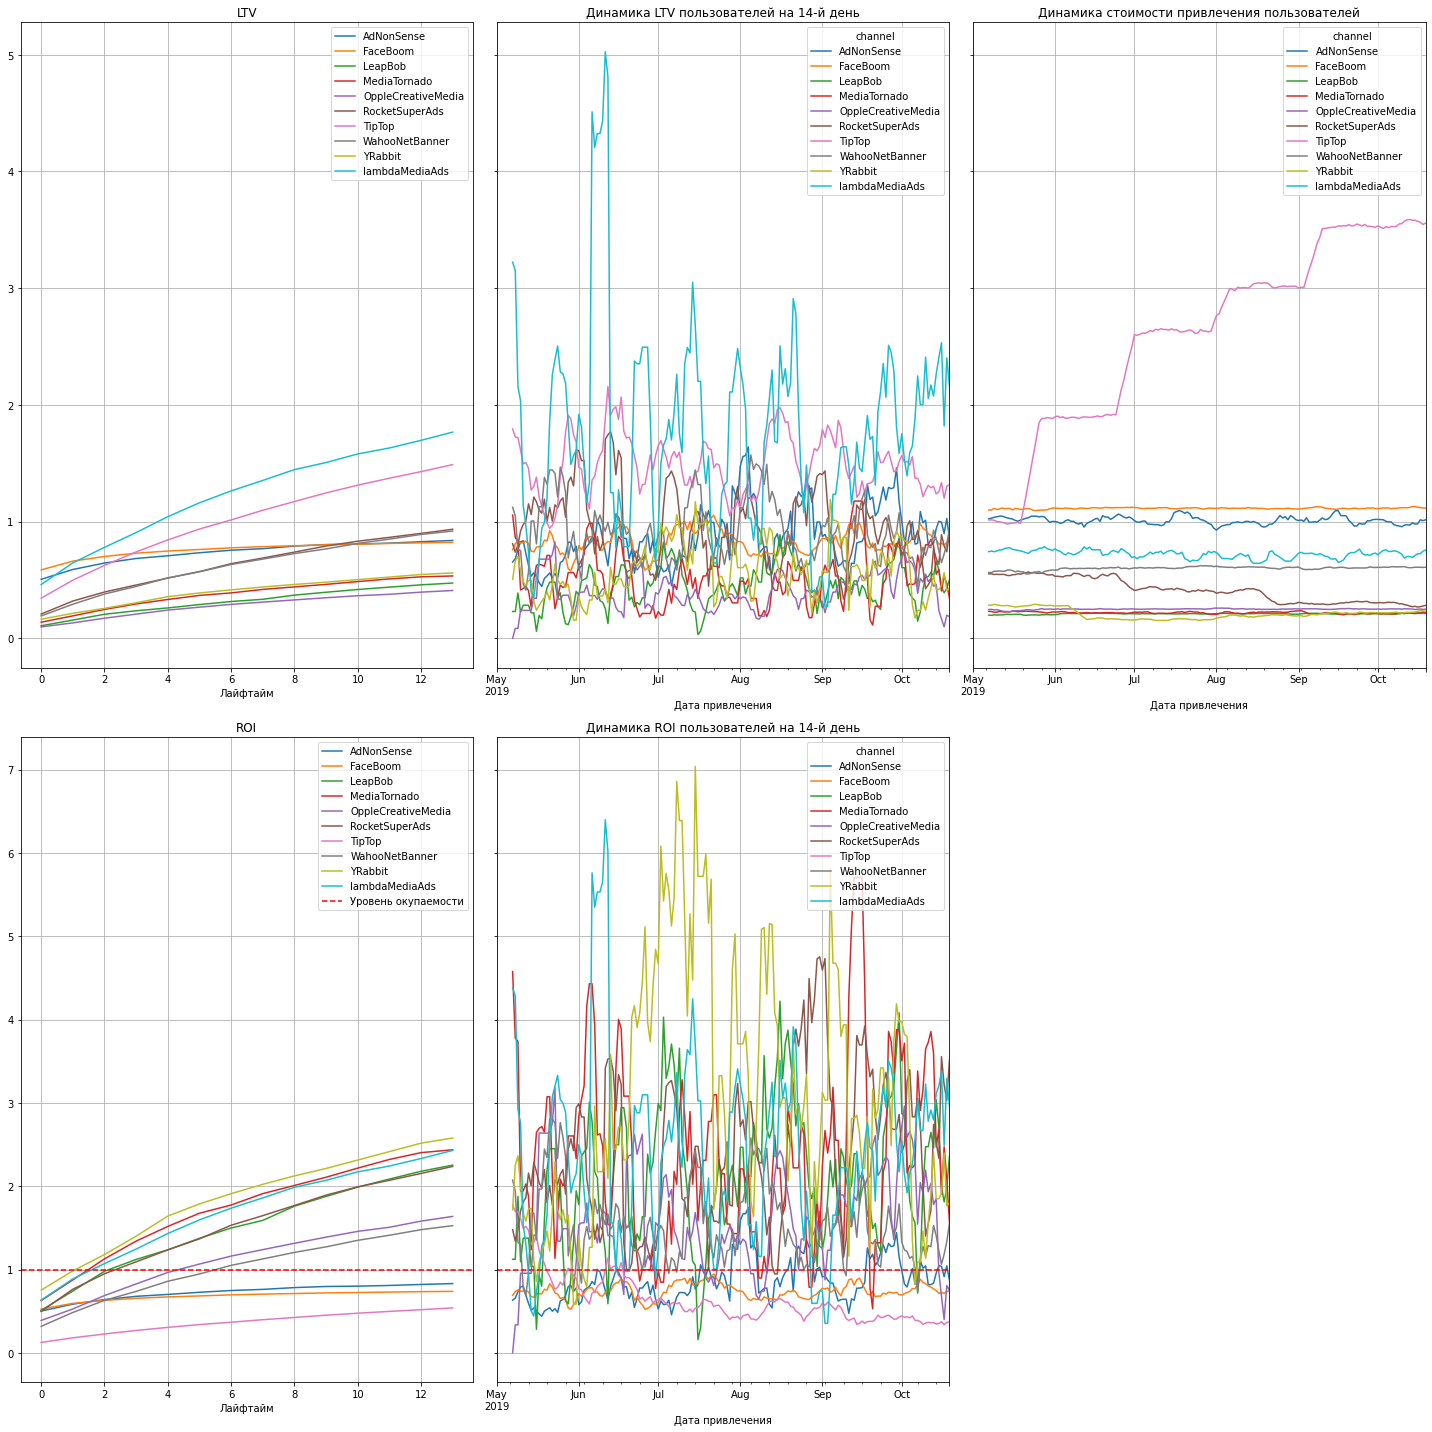

In [51]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- LTV пользователей, привлеченных через любые каналы, растет (лидеры - lamdaMediaLabs и TipTop)
- Все каналы, кроме трех (TipTop, FaceBoom, AdNonSense) окупаются - ROI больше 1
- Стоимость привлечения пользователей через TipTop растет каждый месяц, остальные каналы показывают ровные графики
- Согласно графику динамики LTV линия lamdaMediaLabs очень волатильна. Аналогично - на графике динамики ROI, только там еще и YRabbit довольно волатилен

- Реклама, направленная на привлечение пользователей, в целом не окупается
- Устройства (Mac, iPhone), страны (США) и рекламные каналы (TipTop, FaceBoom, AdNonSense) могут оказывать негативное влияние на окупаемость рекламы
- Проблемы окупаемости могут быть вызваны непродуманной ориентацией на определенный рынок

#### Дополнительные графики конверсии и удержания в разных разрезах

Построим дополнительные графики, чтобы лучше разобраться в возникших проблемах

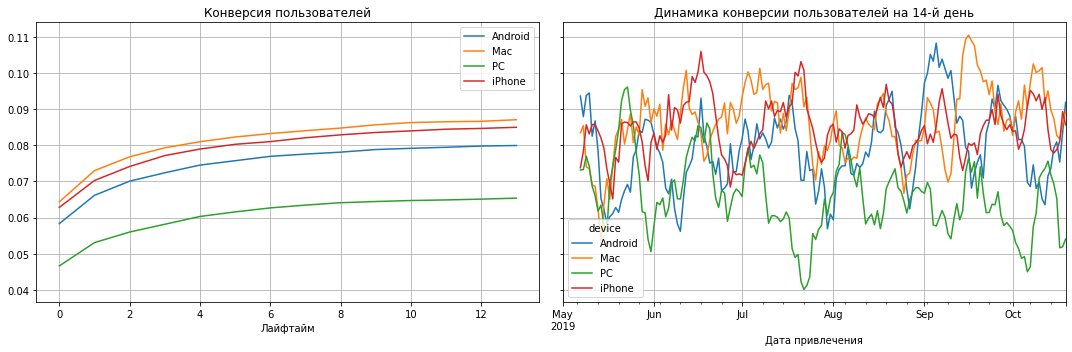

In [52]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['device']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

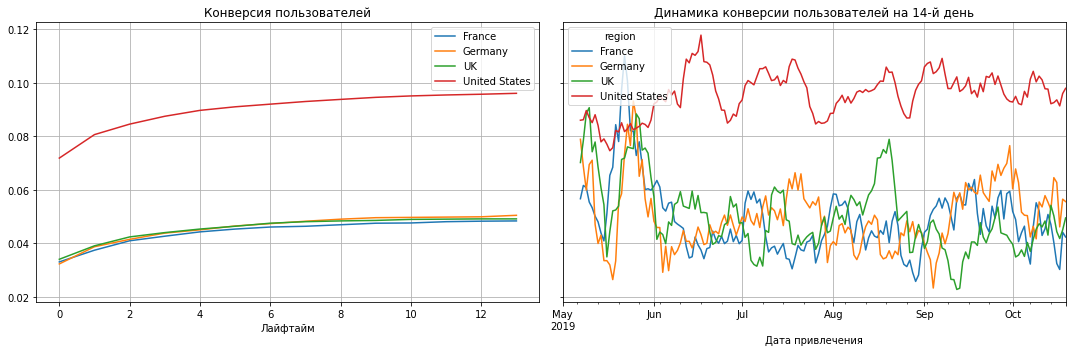

In [53]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['region']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Пользователи Mac и iPhone хорошо конвертируются, как и пользователи из США

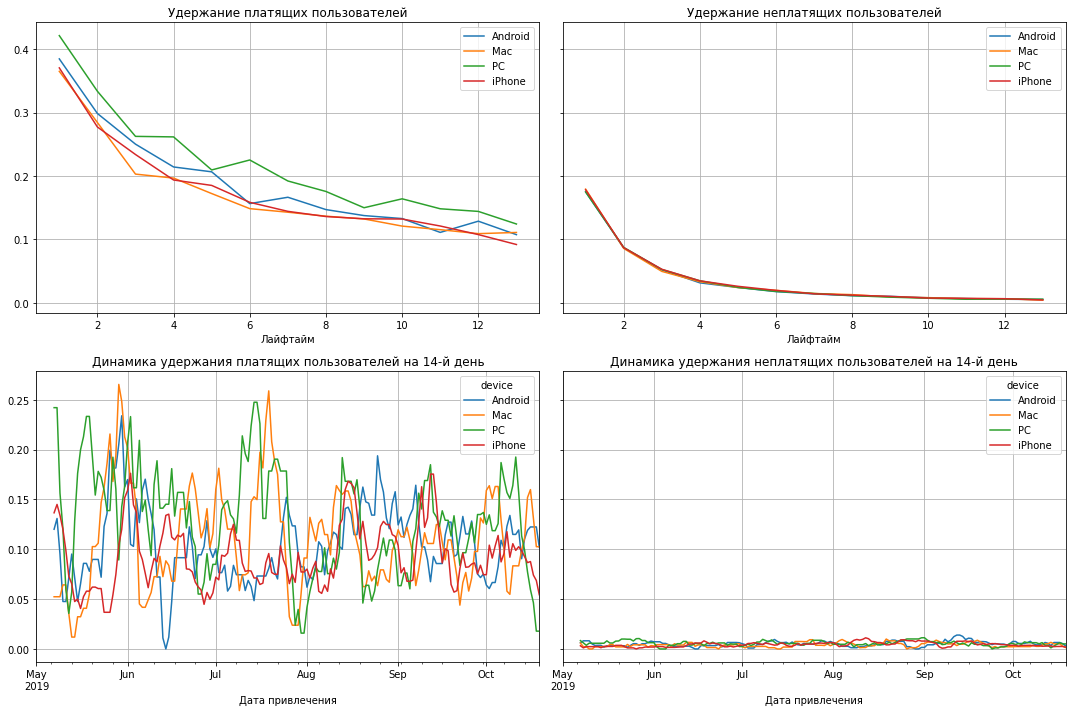

In [54]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=['device']
)
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание на всех платформах примерно одинаковое

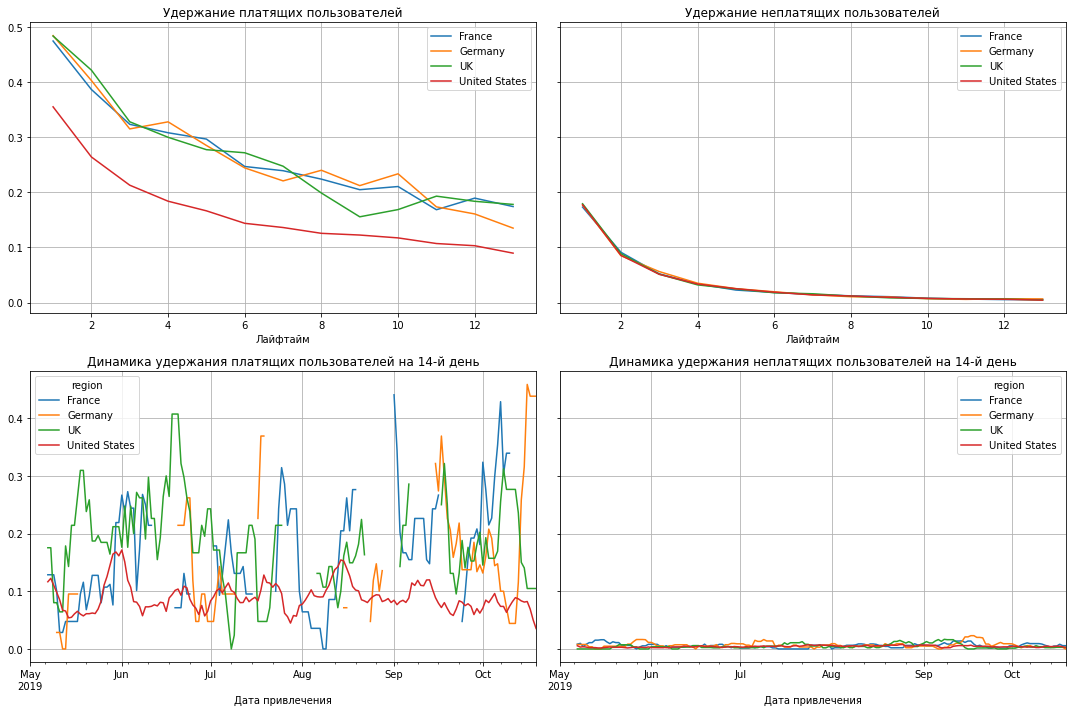

In [55]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=['region']
)
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей из США хуже всего.

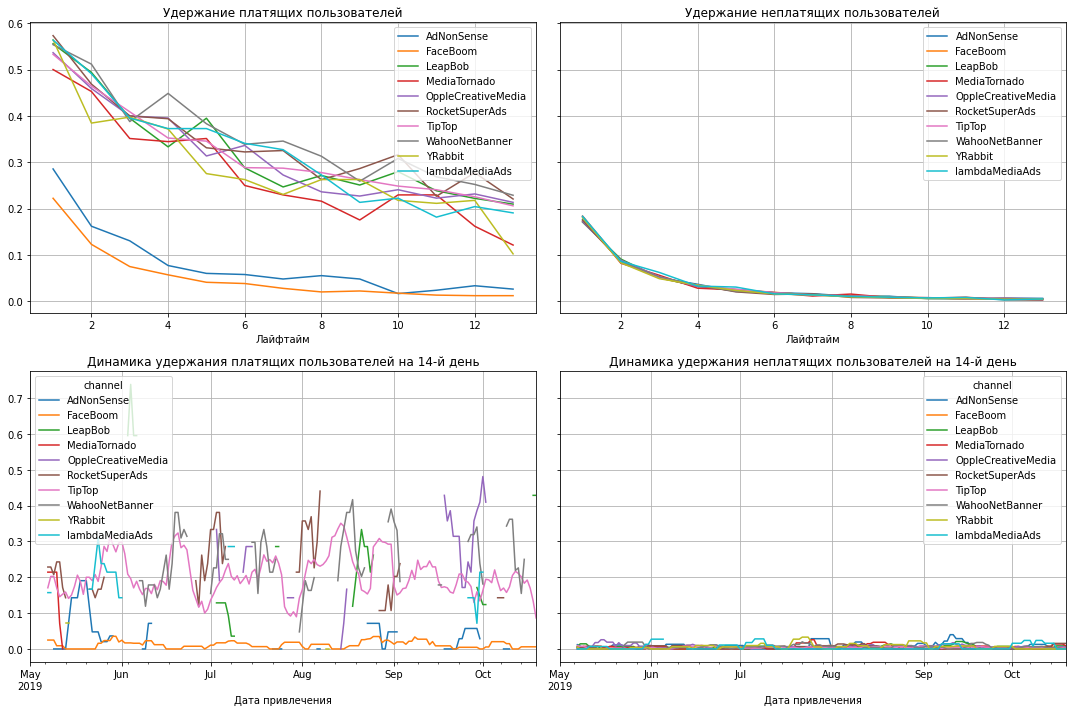

In [56]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей, привлеченных через FaceBoom и AdNonSense, заметно хуже

In [57]:
countries_stat = (profiles_not_organic
                  .groupby(by=['region', 'device'])
                  .agg({'user_id': 'count', 'payer':['sum', 'mean']})
                  .rename(columns={'count': 'users_count', 
                                   'sum': 'count_of_paying', 
                                   'mean': 'share_of_paying'})
                  .droplevel(0, axis=1)
                  .sort_values(['share_of_paying'], ascending=False)
                 )
countries_stat

users_count  count_of_paying  share_of_paying
region        device                                                
United States Android        12436             1317         0.105902
              PC              6421              630         0.098116
              Mac            15424             1507         0.097705
              iPhone         27548             2654         0.096341
France        Mac             1163               69         0.059329
UK            PC              4551              243         0.053395
              Android         3243              173         0.053346
France        iPhone          2198              116         0.052775
Germany       PC              3797              200         0.052673
              iPhone          1862               98         0.052632
              Android         2849              144         0.050544
France        PC              4384              221         0.050411
Germany       Mac             1020               48         0.047059
UK            iPhone          2274              104         0.045734
              Mac             1086               49         0.045120
France        Android         3313              148         0.044673

Таблица построена для того, чтобы убедиться, что в США больше всего пользователей на Mac и iPhone

In [58]:
countries_stat = (profiles_not_organic
                  .query('channel in ["FaceBoom", "AdNonSense", "TipTop", "lambdaMediaAds"]')
                  .groupby(by=['region', 'channel'])
                  .agg({'user_id': 'count', 'payer':['sum', 'mean']})
                  .rename(columns={'count': 'users_count', 
                                   'sum': 'count_of_paying', 
                                   'mean': 'share_of_paying'})
                  .droplevel(0, axis=1)
                 )
countries_stat

users_count  count_of_paying  share_of_paying
region        channel                                                      
France        AdNonSense             1366              150         0.109810
              lambdaMediaAds          742               82         0.110512
Germany       AdNonSense             1219              142         0.116489
              lambdaMediaAds          649               67         0.103236
UK            AdNonSense             1295              148         0.114286
              lambdaMediaAds          758               76         0.100264
United States FaceBoom              29144             3557         0.122049
              TipTop                19561             1878         0.096007

#### Дополнительные графики в разрезе США и Европы 

In [59]:
profiles_usa = profiles_not_organic.query('region == "United States"')

In [60]:
profiles_europe = profiles_not_organic.query('region != "United States"')

USA

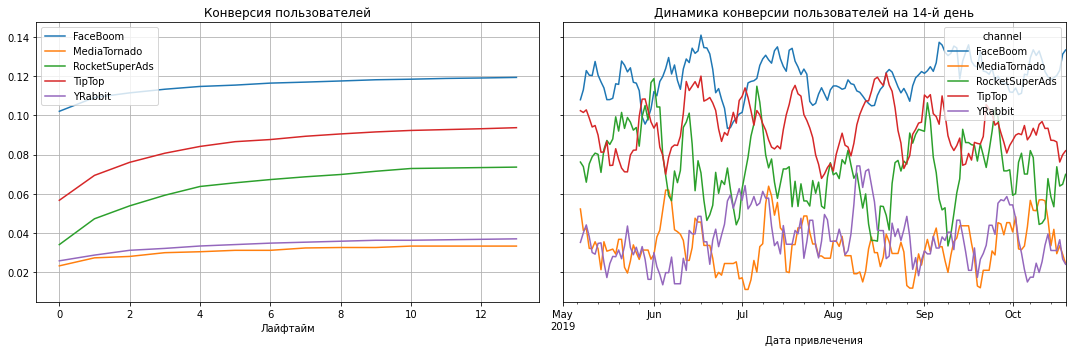

In [61]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

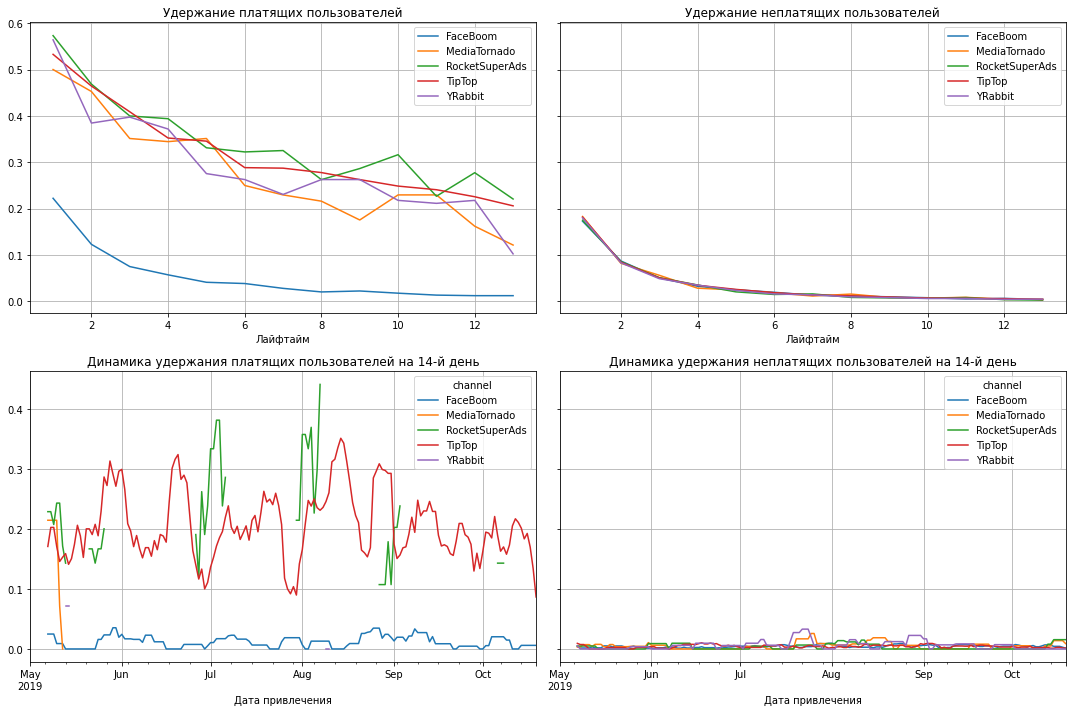

In [62]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention_grouped, retention_history, horizon_days)

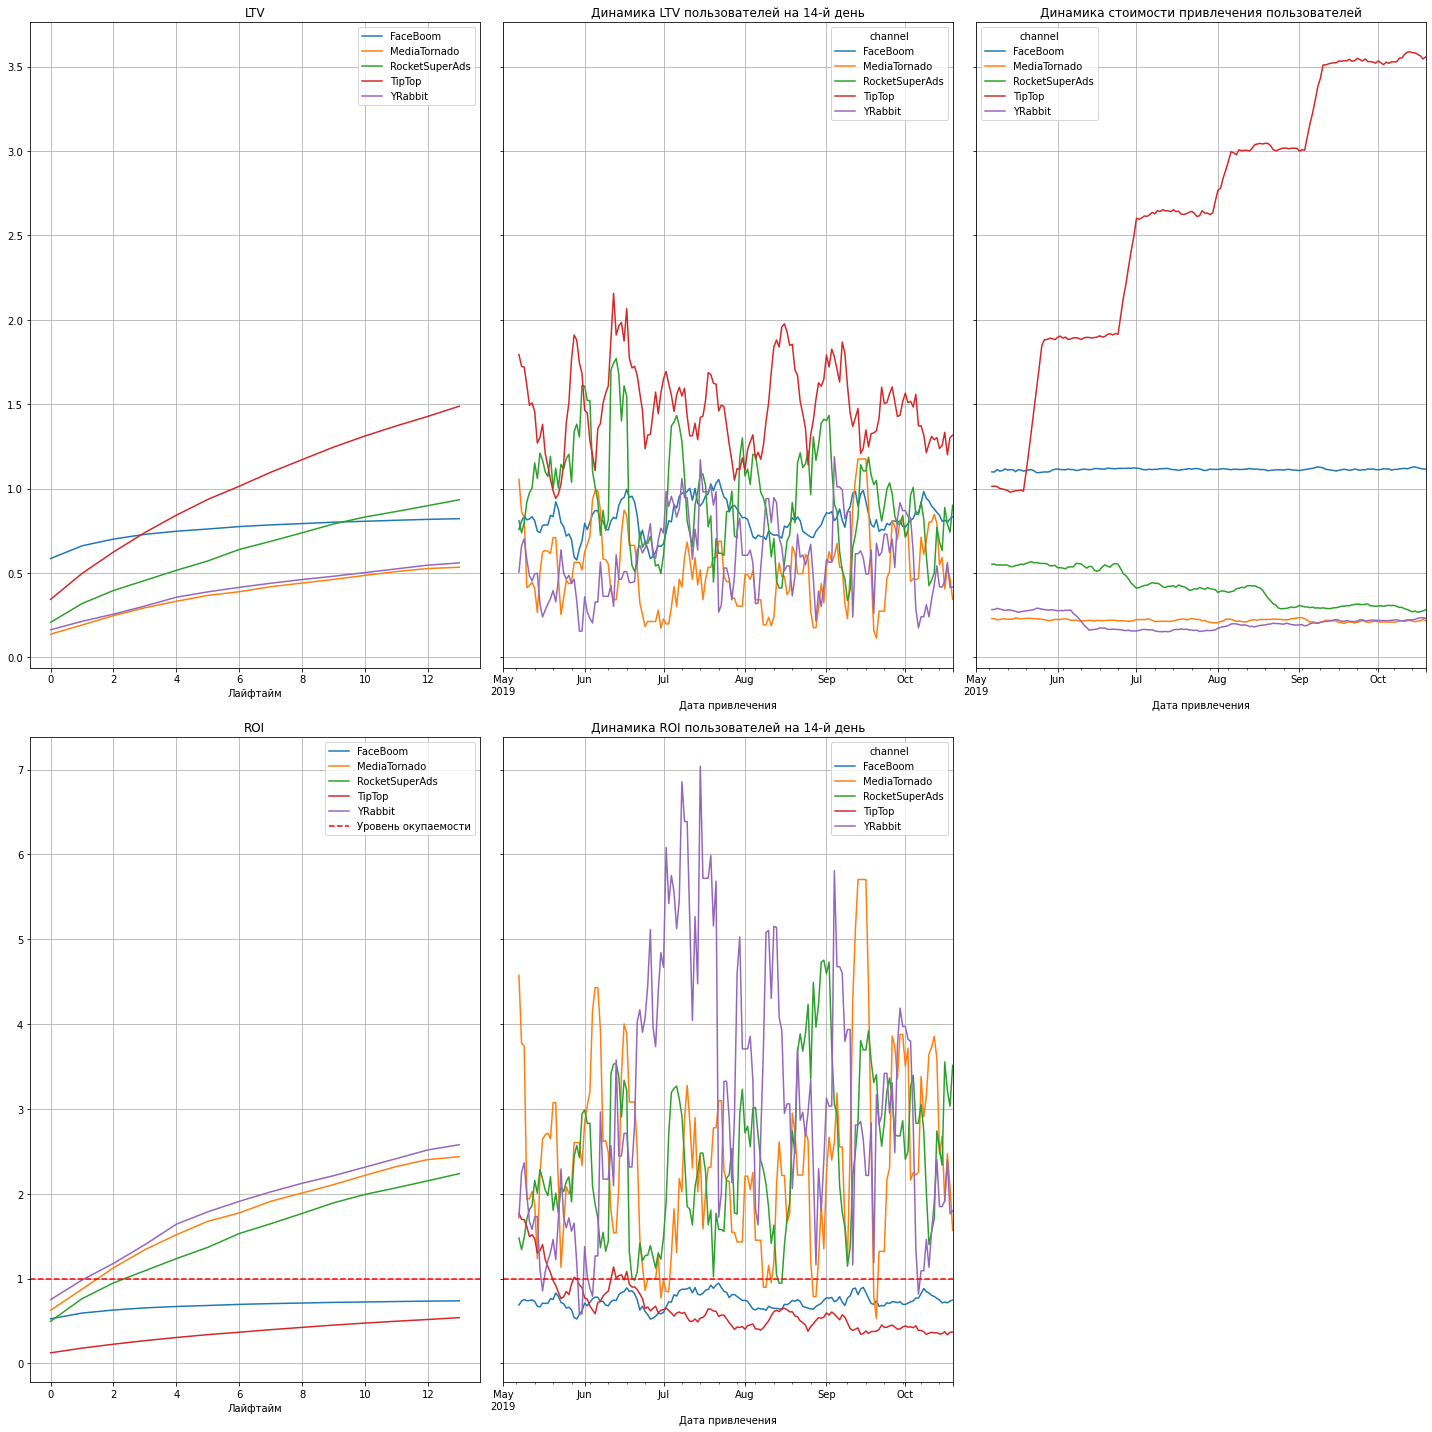

In [63]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Выводы по США не меняются:
- TipTop и FaceBoom не окупаются
- YRabbit, MediaTornado, RocketSuperAds - довольно хорошие окупающиеся каналы (ROI > 1)
- CAC по каналам TipTop и FaceBoom довольно высоки, по оставшимся более хорошим каналам даже немного снижаются

Europe

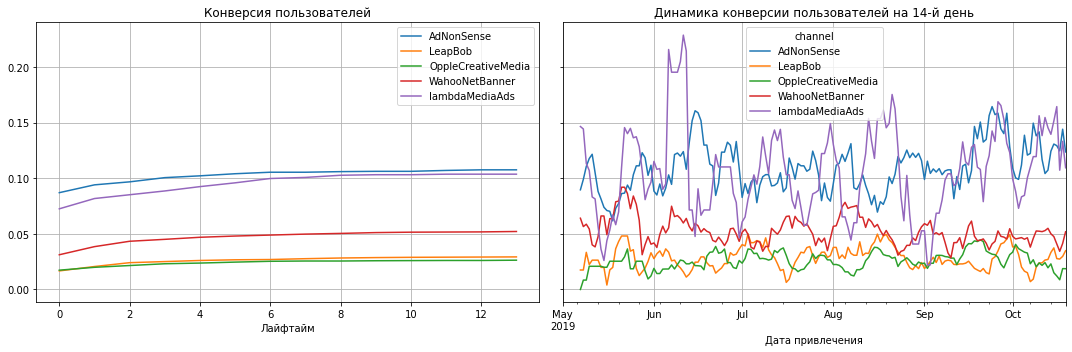

In [64]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_europe, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

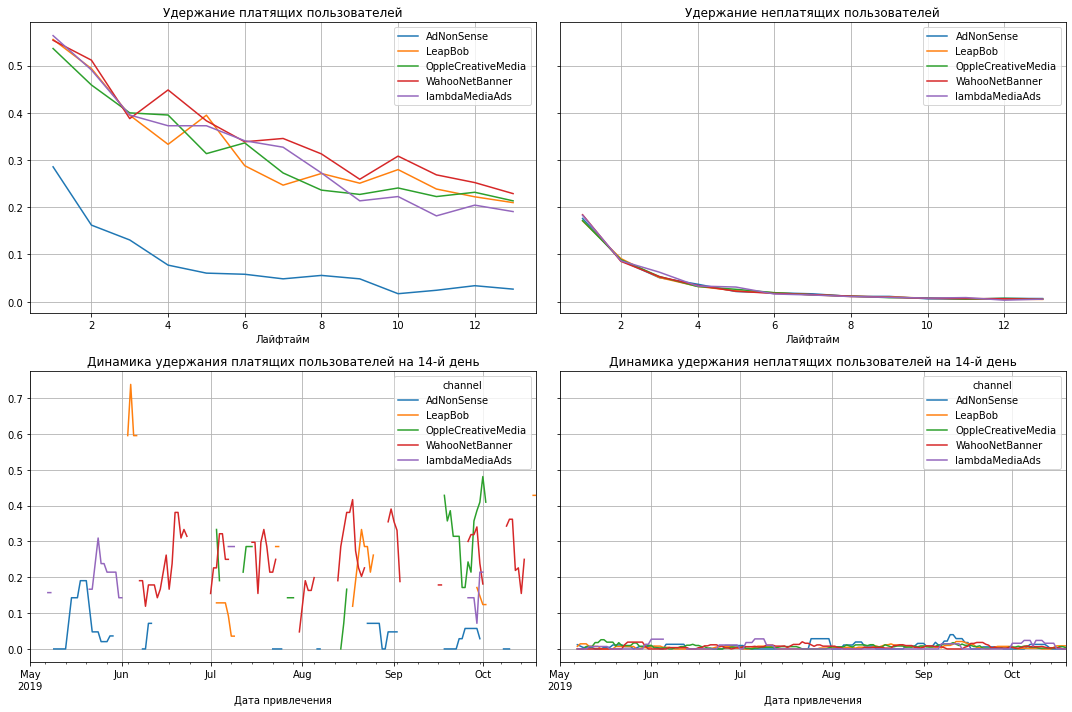

In [65]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_europe, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention_grouped, retention_history, horizon_days)

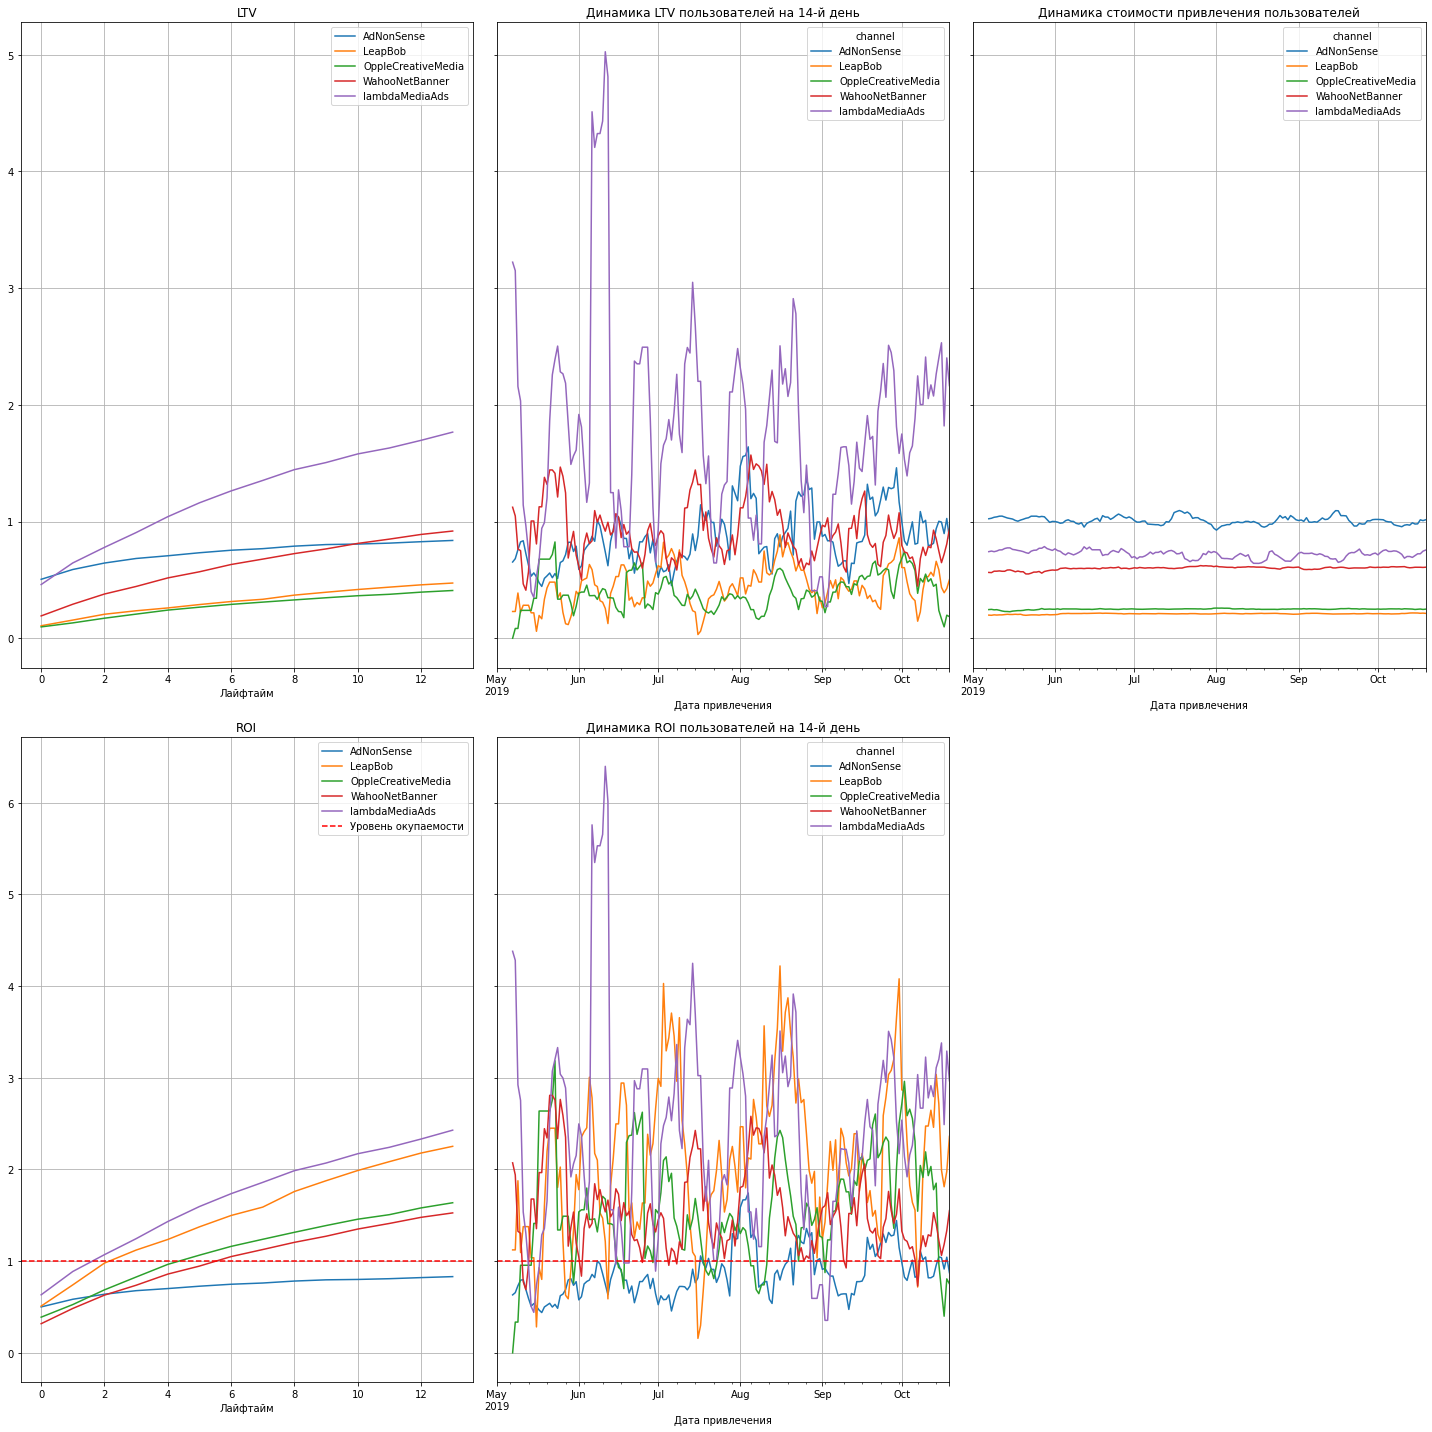

In [66]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_europe, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Среди европейских каналов продаж тоже есть аутсайдер - AdNonSense (ROI < 1)
- Янвый лидер - lambdaMediaAds (ROI > 1, LTV растет сильнее всего)
- CAC по всем каналам стабилен, но по AdNonSense выше остальных

### Выводы

**ROI**
- ROI в конце периода анализа сильно не дотянул до 1, следовательно реклама в целом не окупается
- При этом только PC окупаются, а Mac, iPhone и Android - нет
- Реклама в США не окупается, в отличие от всех других стран
- Все каналы, кроме трех (TipTop, FaceBoom, AdNonSense) окупаются

**Конверсия**
- Пользователи Mac и iPhone хорошо конвертируются, как и пользователи из США
Значит проблема не в конверсии

**Удержание**
- Удержание платящих пользователей, привлеченных через FaceBoom и AdNonSense, заметно хуже других каналов
- Удержание платящих пользователей из США хуже всего

**CAC**
- CAC сильно растет (рекламный бюджет постоянно увеличивается)
- По устройствам в лидерах роста iPhone и Mac, по странам - США, по источникам TipTop


Причины неэффективности привлечения пользователей в плохом удержании пользователй самого массового рынка (США)

США - страна с самой высокой долей платящих пользователей. Также больше всего платящих пользователей среди пользователй Mac и iPhone. Большинство пользователей на этих платформах как раз из США. Проблем с конверсией не наблюдается.

Наибольшую долю платящих пользователей США удается привлечь через каналы FaceBoom и TipTop (только США).

На канал TipTop приходится почти половина всех маркетинговых расходов компании. При этом лишь 9,6% пользователй, привлеченных через TipTop становятся платящими. На втором месте по суммарным затратам - FaceBoom. На рекламные компании через эти 2 канала расходы стабильно растут практически на всем периоде анализа.

Чтобы привлечь одного пользователя через TipTop приходится потратить 2,8 доллара. FaceBoom обходитится почти в 3 раза дешевле.

Стоимость привлечения пользователей через TipTop растет скачками каждый месяц, остальные каналы показывают ровные графики. При этом удержание пользователей, привлеченных через TipTop намного лучше, чем через FaceBoom.

(**NEW**)В США YRabbit, MediaTornado, PocketSuperAds - довольно хорошие окупающиеся каналы (ROI > 1, CAC невысокий)

(**NEW**)Среди европейских каналов продаж тоже есть аутсайдер - AdNonSense (ROI < 1, CAC выше, чем по остальным каналам)
Янвый лидер - lambdaMediaAds (ROI > 1, LTV растет сильнее всего)


**Рекомендации:**
- пересмотреть отношения с каналом TipTop. Возможно, у него слишком завышенные цены. CAC этого канала растет ступенчато каждый месяц. Возможно, канал каждый месяц повышает цены на свои услуги.
- проверить, может рекламные кампании TipTop настроены не совсем правильно: возможно, уже привлеченные клиенты "привлекаются заново" и этим объясняется нормальный показатель удержания по каналу в сравнении с каналом FaceBoom. То есть компания как будто доплачивает за удержание клиентов
- пересмотреть отношения с каналом FaceBoom - его условия точно лучше TipTop, однако канал все равно не окупается
- рассмотреть возможность снизить расходы на маркетинг в США. Возможно, проблемы окупаемости рекламы могут быть вызваны непродуманными попытками завоевать рынок США. Европа окупается с куда меньшими затратами на маркетинг.
- лучше локализовать приложение для жителей США. Возможно, приложение Procrastinate Pro+ просто не нравится пользователям из США. Может, оно не подходит под менталитет и культурные реалии жителей США. Пользователи охотно скачивают приложение из-за агрессивного маркетинга, но дальше приложению нечем их зацепить и пользователи уходят
- (**NEW**) в США стоит больший упор сделать на каналы YRabbit, MediaTornado, RocketSuperAds, максимально вкладываясь в последний. Все 3 канала окупаются, а также средний CAC на одного клиента по ним меньше 0,5 долларов, но по RocketSuperAds еще и конверсия довольно высокая (среди нормальных каналов в США) и неплохое удержание
- (**NEW**) в Европе также нужно пересмотреть отношения с каналом AdNonSense - относительно дорогой и неокупающийся канал. Конверсия высокая, но удержание значительно хуже остальных каналов
- (**NEW**) в Европе стоит развивать отношения с каналом lambdaMediaAds (средний CAC 0,72 доллара), ROI по нему выше всего и LTV растет высокими темпами по сравнению с другими каналами. Конверсия очень хорошая и удержание вполне стандартное